In [ ]:
#My imports list
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Load in my CSV's
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Turn my CSV's into dataframes
df_renewable_energy_share = pd.read_csv('/content/drive/MyDrive/Python/Datasets/renewable-share-energy.csv')
df_primary_energy_cons = pd.read_csv('/content/drive/MyDrive/Python/Datasets/primary-energy-cons.csv')
df_modern_renewable_energy_consumption = pd.read_csv('/content/drive/MyDrive/Python/Datasets/modern-renewable-energy-consumption.csv')
df_temperature_anomaly = pd.read_csv('/content/drive/MyDrive/Python/Datasets/temperature-anomaly.csv')
df_number_of_deaths_by_risk_factor = pd.read_csv('/content/drive/MyDrive/Python/Datasets/number-of-deaths-by-risk-factor.csv')

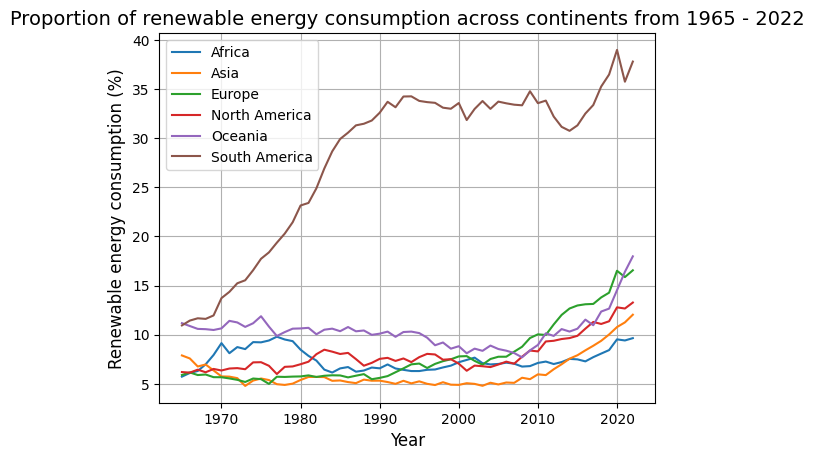

In [ ]:
#getting the data I want from my df_renewable_energy_share
#I require Entities: North America, South America, Oceania, Europe, Asia, Africa - Maybe include world as well?
# Also require the uears and the Primary Energy consumption

#Remove the columns I do not want:
df = df_renewable_energy_share.drop(['Code'], axis=1)
df = df.rename(columns={'Renewables (% equivalent primary energy)' : 'Primary Energy'})

entities = ['North America', 'South America', 'Oceania', 'Europe', 'Asia', 'Africa']
#Get only the entities I require
df_selected = df[df.iloc[:,0].isin(entities)].iloc[:, [0, 1, 2]]
#df_selected is now the dataframe that I am to use for the current plot

grouped = df_selected.groupby('Entity')

for name, group in grouped:
    plt.plot(group['Year'], group['Primary Energy'], label=name)

plt.title('Proportion of renewable energy consumption across continents from 1965 - 2022', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Renewable energy consumption (%)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

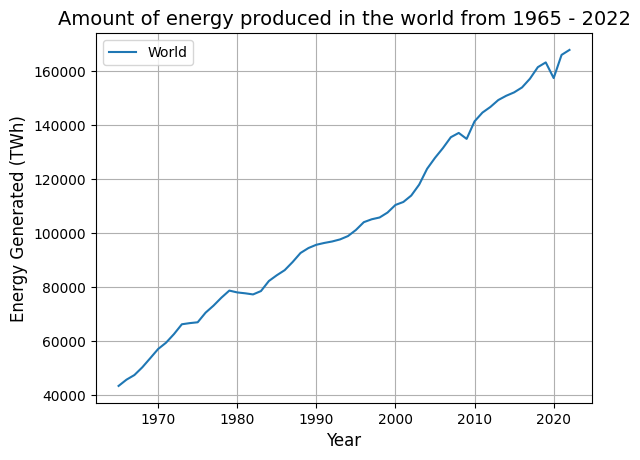

In [ ]:
# Now I need primary energy consumption of the world using df_primary_energy_cons dataframe

df = df_primary_energy_cons.drop(['Code'], axis=1)
df = df.rename(columns={'Primary energy consumption (TWh)' : 'Energy Consumption'})
df.head()
entities = ['World']
df_selected = df[df.iloc[:,0].isin(entities)].iloc[:, [0, 1, 2]]
df_selected.shape

grouped = df_selected.groupby('Entity')
for name, group in grouped:
    plt.plot(group['Year'], group['Energy Consumption'], label=name)

plt.title('Amount of energy produced in the world from 1965 - 2022', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Energy Generated (TWh)', fontsize=12)
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

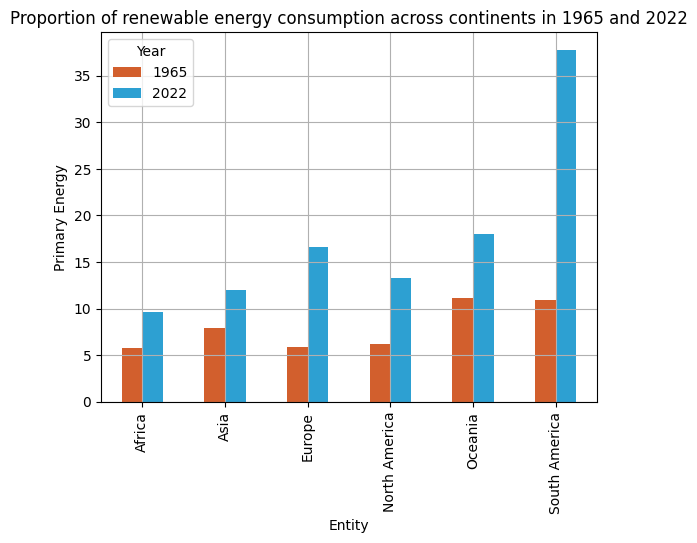

In [ ]:
# The next chart is using the df_renewable_energy_share dataframe again
df = df_renewable_energy_share.drop(['Code'], axis=1)
df = df.rename(columns={'Renewables (% equivalent primary energy)' : 'Primary Energy'})

entities = ['North America', 'South America', 'Oceania', 'Europe', 'Asia', 'Africa']
#Get only the entities I require
df_selected = df[df.iloc[:,0].isin(entities)].iloc[:, [0, 1, 2]]
#df_selected is now the dataframe that I am to use for the current plot

# grouped = df_selected.groupby('Entity')

df_selected_years = df_selected[df_selected['Year'].isin([1965, 2022])]
df_pivot = df_selected_years.pivot(index='Entity', columns='Year', values='Primary Energy')

df_pivot.plot(kind='bar', color=['#d25f2d', '#2da0d2'])
plt.xlabel('Entity')
plt.ylabel('Primary Energy')
plt.grid(True)
plt.title('Proportion of renewable energy consumption across continents in 1965 and 2022')
plt.show()

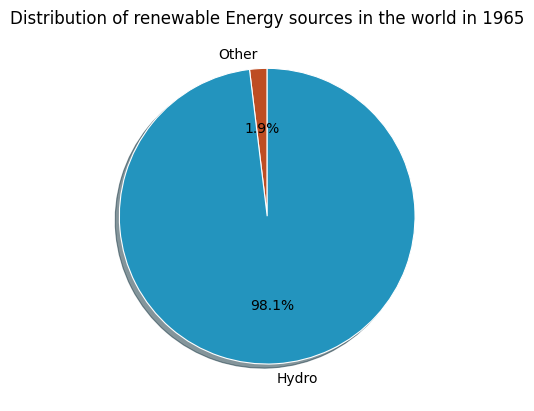

In [ ]:

# Graph 1.3
# Now I want 2 pie charts one from renewable energy  sources in 1965 and another from 2022
# I need to use the following dataframe:
# df_modern_renewable_energy_consumption

# first, get rid of code
df = df_modern_renewable_energy_consumption.drop(['Code'], axis=1)

# now change the columns

df = df.rename(columns={'Other renewables (including geothermal and biomass) electricity generation - TWh' : 'Other',
                        'Solar generation - TWh' : 'Solar',
                        'Wind generation - TWh' : 'Wind',
                        'Hydro generation - TWh' : 'Hydro'})



# now I need to get just the years I want:
entities = ['World']
df_selected = df[df.iloc[:,0].isin(entities)].iloc[:, [0, 1, 2, 3,4,5]]

df_year_1965 = df_selected[df_selected['Year'].isin([1965])]

df_year_2022 = df_selected[df_selected['Year'].isin([2022])]

labels = ['Other','Hydro']
colors = ['red','blue']

colors = ['#be4d23','#2394be']

selected_entity_row_1965 = df_year_1965[df_year_1965['Entity'] == 'World']
data_for_pie_1965 = selected_entity_row_1965.iloc[0].drop(['Entity','Year', 'Solar', 'Wind'])

data_for_pie_1965.plot(kind='pie', labels = labels, autopct='%1.1f%%',shadow=True, startangle=90, colors = colors, wedgeprops = { 'linewidth' : 0.8, 'edgecolor' : 'white' })
plt.title('Distribution of renewable Energy sources in the world in 1965')
plt.ylabel('')  # this is to remove the default 'None' ylabel

plt.show()



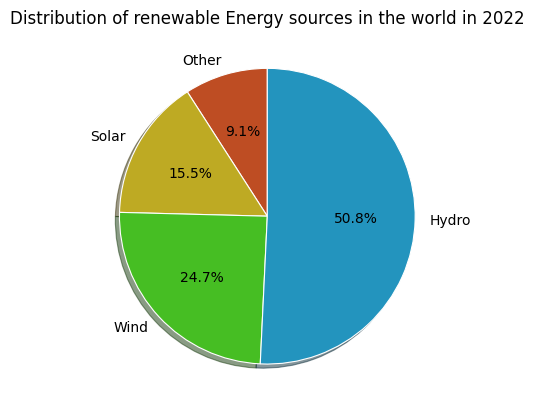

In [ ]:
# Graph 1.4
selected_entity_row_2022 = df_year_2022[df_year_2022['Entity'] == 'World']
data_for_pie_2022 = selected_entity_row_2022.iloc[0].drop(['Entity','Year'])

labels = ['Other', 'Solar', 'Wind', 'Hydro']
colors = ['red','yellow', 'green', 'blue']

colors = ['#be4d23', '#beaa23', '#46be23', '#2394be']


data_for_pie_2022.plot(kind='pie', labels = labels, autopct='%1.1f%%',shadow=True, startangle=90, colors = colors, wedgeprops = { 'linewidth' : 0.8, 'edgecolor' : 'white' })
plt.title('Distribution of renewable Energy sources in the world in 2022')
plt.ylabel('')  # this is to remove the default 'None' ylabel
plt.show()

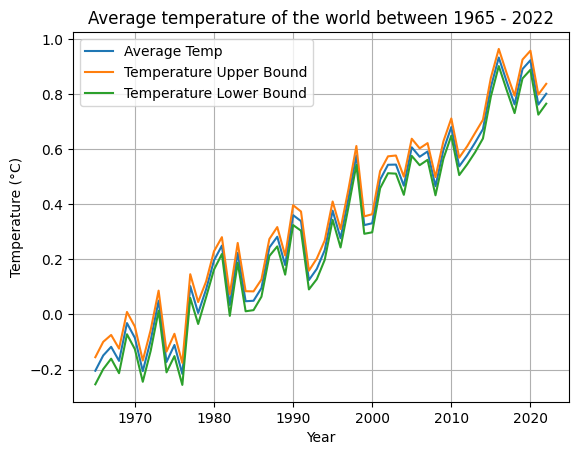

In [ ]:
# Graph 2.0
# First I need to drop code column and then change the column headers.

df = df_temperature_anomaly.drop(['Code'], axis=1)

# now change the columns

df = df.rename(columns={'Global average temperature anomaly relative to 1961-1990' : 'Average Temp',
                        'Upper bound of the annual temperature anomaly (95% confidence interval)' : 'Upper Bound',
                        'Lower bound of the annual temperature anomaly (95% confidence interval)' : 'Lower Bound'})


df = df[['Entity', 'Year', 'Average Temp', 'Upper Bound', 'Lower Bound']]
df= df[(df['Year'] >= 1965) & (df['Year'] <= 2022)]
df = df[df['Entity'] == 'Global']


# Now df_selected contains only necessary columns
grouped = df.groupby('Entity')

fig, ax = plt.subplots()

for name, group in grouped:
    group.plot(x='Year', y='Average Temp', ax=ax, label='Average Temp')
    group.plot(x='Year', y='Upper Bound', ax=ax, label='Temperature Upper Bound')
    group.plot(x='Year', y='Lower Bound', ax=ax, label='Temperature Lower Bound')



plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.title('Average temperature of the world between 1965 - 2022')
plt.show()

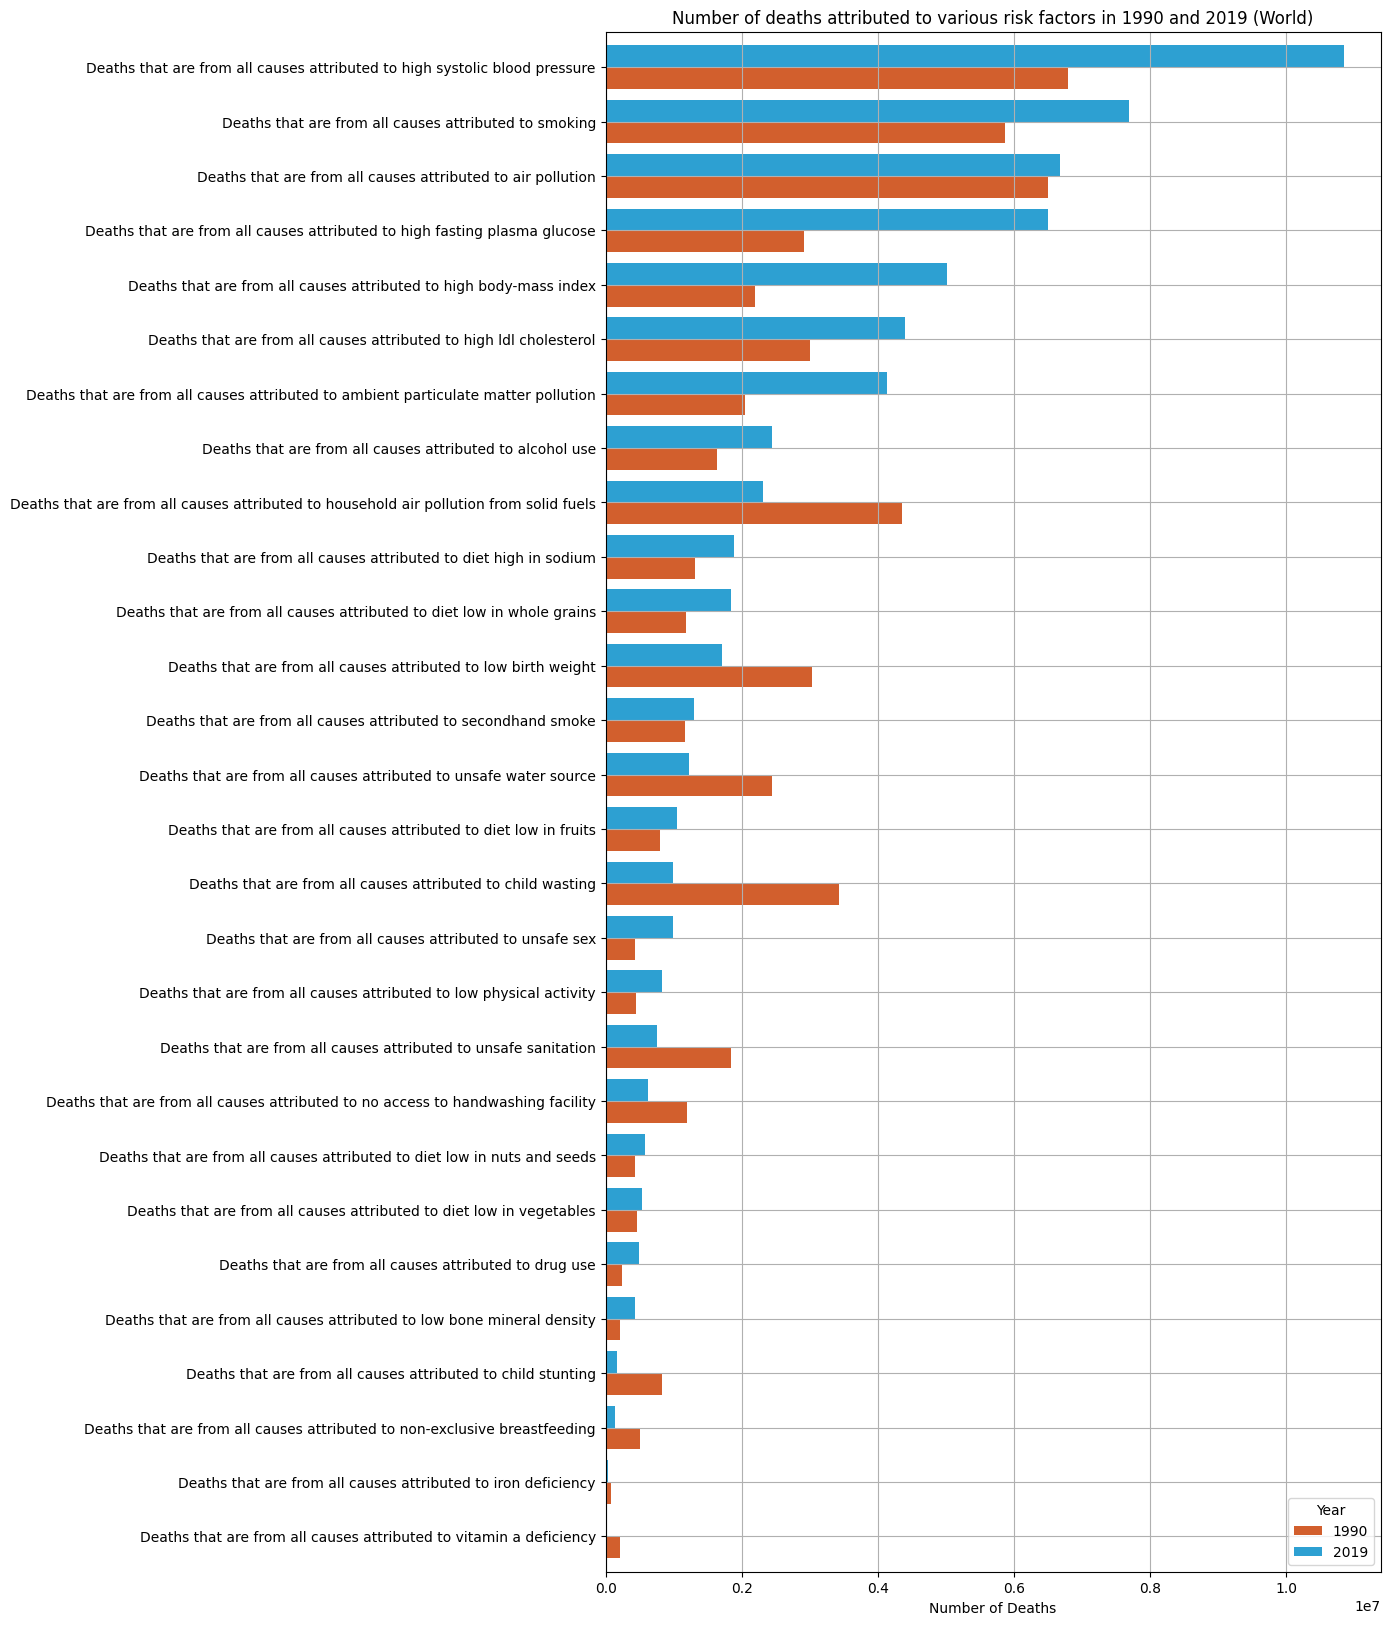

In [ ]:
#Graph 2.1
# Deaths by risk factor using - df_number_of_deaths_by_risk_factor
# I want 2 line graphs on top of each other one from 1990 and another from 2019, by world

df = df_number_of_deaths_by_risk_factor


# First we get rid of Code and group by world
df = df.drop(['Code'], axis=1)
df = df[df['Entity'] == 'World']

# Now to get the dataframes for the correct years:
df= df[(df['Year'] == 1990) | (df['Year'] == 2019)]

df = df.drop(columns=['Entity'])

# Set 'Year' column as index
df = df.set_index('Year')

# Transpose the DataFrame to create a suitable format for a bar plot
df = df.T

df = df.sort_values(by=2019, ascending=True)
df.rename(index = lambda x: str(x)[:-29], inplace=True)


# Plot
df.plot(kind='barh', figsize=(10, 20), width=0.8, color=['#d25f2d', '#2da0d2'])
plt.title('Number of deaths attributed to various risk factors in 1990 and 2019 (World)')
plt.grid(True)
plt.xlabel('Number of Deaths')
plt.show()

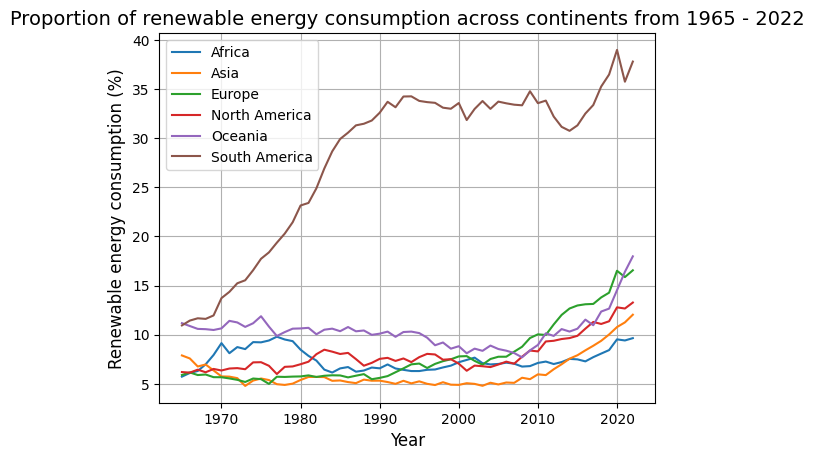

In [ ]:
#getting the data I want from my df_renewable_energy_share
#I require Entities: North America, South America, Oceania, Europe, Asia, Africa - Maybe include world as well?
# Also require the uears and the Primary Energy consumption

#Remove the columns I do not want:
df = df_renewable_energy_share.drop(['Code'], axis=1)
df = df.rename(columns={'Renewables (% equivalent primary energy)' : 'Primary Energy'})

entities = ['North America', 'South America', 'Oceania', 'Europe', 'Asia', 'Africa']
#Get only the entities I require
df_selected = df[df.iloc[:,0].isin(entities)].iloc[:, [0, 1, 2]]
#df_selected is now the dataframe that I am to use for the current plot

grouped = df_selected.groupby('Entity')
fig, ax = plt.subplots()
for name, group in grouped:
    # plt.figure()
    group.plot(x='Year', y='Primary Energy', ax=ax, label=name)

ax.set_title('Proportion of renewable energy consumption across continents from 1965 - 2022', fontsize=14)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Renewable energy consumption (%)', fontsize=12)
ax.grid(True)
plt.show()

In [ ]:
# Now I need primary energy consumption of the world using df_primary_energy_cons dataframe

df = df_primary_energy_cons.drop(['Code'], axis=1)
df = df.rename(columns={'Primary energy consumption (TWh)' : 'Energy Consumption'})
df.head()
entities = ['World']
df_selected = df[df.iloc[:,0].isin(entities)].iloc[:, [0, 1, 2]]
df_selected.shape

grouped = df_selected.groupby('Entity')

fig, ax = plt.subplots()

for name, group in grouped:
    group.plot(x='Year', y='Energy Consumption', ax=ax, label=name)

ax.set_title('Amount of energy produced in the world from 1965 - 2022', fontsize=14)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Energy Generated (TWh)', fontsize=12)
ax.grid(True)
ax.legend(loc='upper left')

plt.show()
# toDo, need to update the labels etc.